</font> <font color="white"><b>1.Introduction</b></font> 

* Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.


* <font color="red"><b>Agriculture</b></font>   Agriculture remains the most important sector of the Cambodian economy in terms of its share of the gross domestic product (GDP), and it employs the vast majority of the workforce.
* <font color="red"><b>Rice</b></font>   is Cambodia’s major crop, its principal food, and, in times of peace, its most important export commodity.

* Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!


</font>  <font color="white"><b>2.Objective</b></font>  

* To solve above problems , our team would love to give an insight on how different technologies could be combined to form sophisticated systems for agricultural applications by applying Machine Learning techniques to predict the best suitable crop to grow in a region in order to get the genuine decision I am using historical data based on the nutritional value of the soil and weather conditions


<font color="white"><b>3.Source of Data</b></font>  
 
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India. Gathered over the period by ICFA, India.



<font color="white"><b>4.Data fields</b></font> 
######  <font color="red"><b>Data shape:  2200 rows, 8 columns</b></font>  
###### N - ratio of Nitrogen content in soil.
###### P - ratio of Phosphorous content in soil.
###### K - ratio of Potassium content in soil.
###### temperature - temperature in degree Celsius.
###### humidity - relative humidity in %.
###### ph - ph value of the soil.
###### rainfall - rainfall in mm.

<font color="white"><b>5.Import libraries</b></font>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
# Import Library for Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats
# Loading dataset
sns.set()
data=pd.read_csv(filepath_or_buffer='./Advertising Budget and Sales.csv',
                 index_col=[0])
data

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [2]:
columns=["tv","radio","news","sales"]
data.columns=columns
data.head()

,tv,radio,news,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.corr()

,tv,radio,news,sales
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
news,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


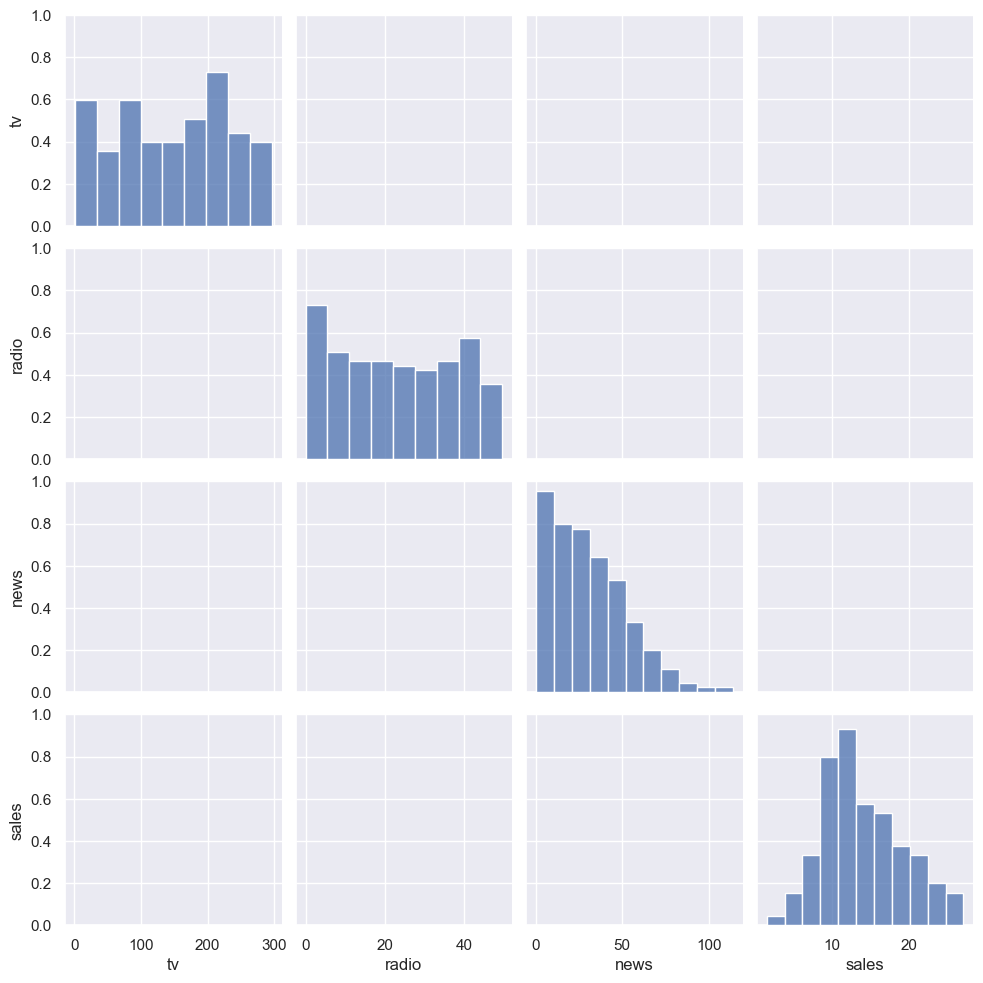

In [4]:
import seaborn as sns
sns.pairplot(kind="rag",data=data)

In [5]:
tv_scaler = StandardScaler().fit(X=data[["tv"]])
tv_scaler

StandardScaler()

In [6]:
radio_scaler = StandardScaler().fit(X=data[["radio"]])
radio_scaler

StandardScaler()

In [7]:
news_scaler = StandardScaler().fit(X=data[["news"]])
news_scaler

StandardScaler()

In [8]:
dict_scaler=dict()
for col in columns:
    dict_scaler[col]=StandardScaler().fit(data[[col]])
dict_scaler

{'tv': StandardScaler(),
 'radio': StandardScaler(),
 'news': StandardScaler(),
 'sales': StandardScaler()}

In [9]:
dict_scaler["tv"].transform(X=data[["tv"]])

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

In [10]:
sales_scaler = StandardScaler().fit(X=data[["sales"]])
sales_scaler

StandardScaler()

In [11]:
# df=data.copy()
# for col in columns:
#     df[col]=dict_scaler[col].transform(X=data[[col]])
#     df[col]

In [19]:
df = data.copy()
for col in columns:
    df[col] = dict_scaler[col].transform(X=data[[col]])
df.head()

,tv,radio,news,sales
1,-1.705672,-1.504592,-1.324568,-2.396137
2,-1.730979,-1.497753,-1.375634,-2.828098
3,-1.734701,-1.467661,-1.324356,-2.868710
4,-1.716390,-1.488634,-1.347240,-2.529048
5,-1.712394,-1.627697,-1.347452,-2.735799


In [12]:
df=data.copy()
data["tv"] = tv_scaler.transform(X=data[["tv"]])
data["radio"] = radio_scaler.transform(X=data[["radio"]])
data["news"] = news_scaler.transform(X=data[["news"]])
data["sales"] = sales_scaler.transform(X=data[["sales"]])
data.head()

,tv,radio,news,sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


In [13]:
target="sales"
features=data.columns.to_list()
features.remove(target)
print(target)
print(features)

sales
['tv', 'radio', 'news']


In [14]:
X= data[features].values
y= data[target].values
print(X[0:5, :])
print(y[0:5])

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]
[ 1.55205313 -0.69604611 -0.90740587  0.86033029 -0.21568303]


In [15]:
from sklearn.linear_model import LinearRegression
# Assuming x and y are already defined
robot=LinearRegression().fit(X=X, y=y)
robot

LinearRegression()

<Axes: ylabel='Density'>

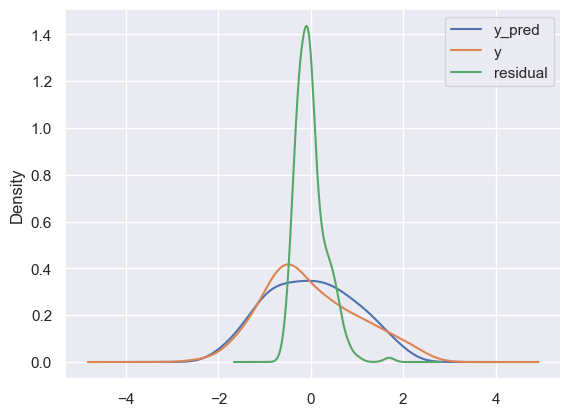

In [16]:
y_pred =robot.predict(X=X)
result =pd.DataFrame(
    data=dict(
        y_pred=y_pred,
        y=y,
        residual=y_pred -y,
    )
)
result.plot.kde()